## Importing Libraries

In [18]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Disable Warnings

In [17]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Import the Fashion MNIST dataset

In [19]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess The Data

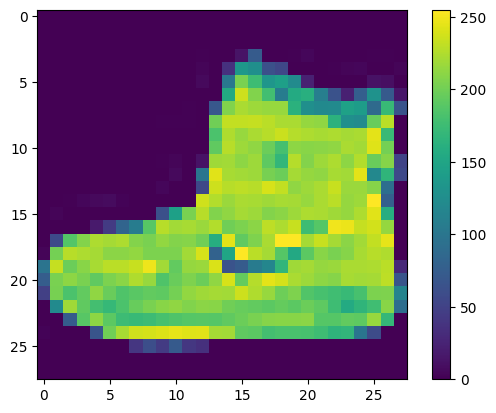

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_images = train_images / 255.0
test_images = test_images / 255.0

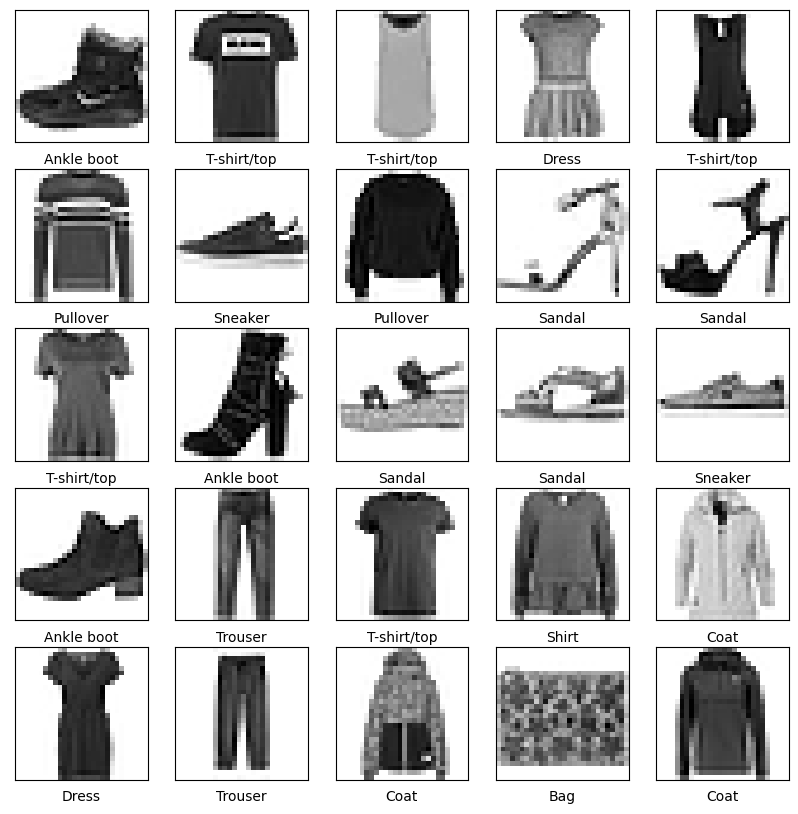

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Image Classification with TensorFlow: Building Model

## Setting Up Layers

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## Compiling The Model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training Model

In [26]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 22s 10ms/step - loss: 0.5029 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3770 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3369 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3127 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2802 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2656 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2568 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2486 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0

In [10]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([9.8625321e-07, 1.2212043e-11, 5.2798028e-09, 8.1216225e-09,
       4.6815941e-08, 2.2719016e-04, 1.0956453e-06, 1.3344918e-03,
       2.4805175e-07, 9.9843591e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

9

In [12]:
test_labels[0]

9

In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

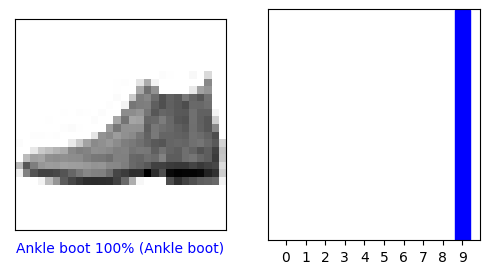

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

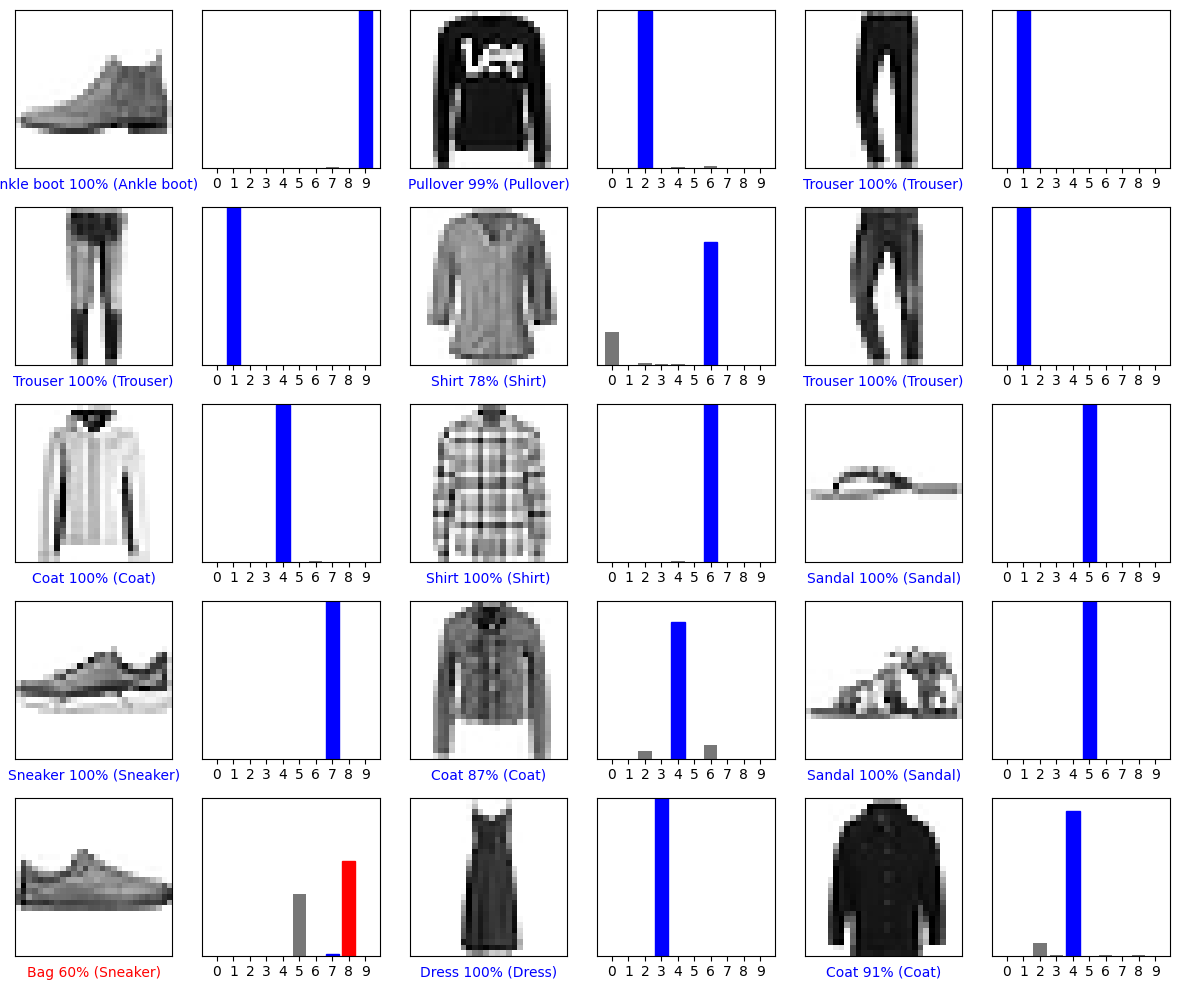

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()